In [237]:
# Import work
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

red_wine = pd.read_csv('winequality-red.csv',  delimiter= ';')
white_wine = pd.read_csv('winequality-white.csv', delimiter= ';')


In [238]:
# we are creating a new column called "quality_label", we define a range and associate that range with a label
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'Low'
if value <= 5 else 'Medium'
if value <= 7 else 'High')

white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'Low'
if value <= 5 else 'Medium'
if value <= 7 else 'High')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
categories=['Low', 'Medium', 'High'])

white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
categories=['Low', 'Medium', 'High'])

white_wine = white_wine.assign(wine_type=0)
red_wine = red_wine.assign(wine_type=1)

In [239]:
rw = pd.DataFrame(red_wine)
ww = pd.DataFrame(white_wine)

In [290]:
ww.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,Medium,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,Medium,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,Medium,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Medium,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Medium,0


In [241]:
all_wine = pd.concat([white_wine, red_wine], ignore_index=True)
all_wine.shape[0]

6497

In [242]:
#finding empty values in the columns
all_wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
quality_label           0
wine_type               0
dtype: int64

In [243]:
#finding the duplicates
all_wine.duplicated().sum()

1177

In [244]:
#removing all duplicates
all_wine.drop_duplicates(inplace=True)

In [245]:
X = all_wine.drop(columns=['quality_label', 'wine_type'])
y = all_wine['wine_type']

X.shape

(5320, 12)

In [246]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [403]:
y_test.shape

(1064,)

In [387]:
#Scaler
# data normalisation with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform data
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [388]:
#making the KNN model
model = KNeighborsClassifier()
model.fit(X_train_norm, y_train)

#testing the accuracy of the model
y_pred = model.predict(X_test_norm)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy*100:.0f}%')
#great results for White wine 1, struggles with Red 1237

Accuracy: 98%


c:\Users\renev\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [323]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

#making the Linear regresion model
reg_area = linear_model.LinearRegression()
reg_area.fit(X_train.values, y_train.values)

# Predict values using test data.
reg_area_score = (reg_area.score(X.values, y.values))
print(f'Accuracy: {reg_area_score*100:.0f}%')

#poor results

Accuracy: 86%


In [389]:
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_norm, y_train)
y_pred = dtc.predict(X_test_norm)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy*100:.0f}%')
#balanced between both Red 16 and White Wines 6

Accuracy: 98%


In [390]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
lreg.fit(X_train_norm, y_train)
y_pred = lreg.predict(X_test_norm)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy*100:.0f}%')
#very good with both Red 73 and White 45

Accuracy: 98%


In [394]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_norm, y_train)
y_pred = rfc.predict(X_test_norm)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy*100:.0f}%')
#excelent with both Red 8 and White 1

Accuracy: 99%


In [395]:
#confusion matrix
from sklearn.metrics import confusion_matrix
print("Confusion matrix:")
labels = np.unique(y_test)
a = confusion_matrix(y_test, y_pred, labels=labels)
a = pd.DataFrame(a, index=("White", "Red"), columns=("White", "Red"))
display(a)

Confusion matrix:


,White,Red
White,797,1
Red,9,257


In [354]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy*100:.0f}%')
#Good resluts with White 81 and Red 283

Accuracy: 92%


In [392]:
#confusion matrix
from sklearn.metrics import confusion_matrix
print("Confusion matrix:")
labels = np.unique(y_test)
a = confusion_matrix(y_test, y_pred, labels=labels)
a = pd.DataFrame(a, index=("White", "Red"), columns=("White", "Red"))
display(a)

Confusion matrix:


,White,Red
White,797,1
Red,8,258


In [396]:
# New wine sample test:
new_wine = [7.4,	0.70,	0.00,	1.9,	0.076,	11.0,	34.0,	0.9978,	3.51,	0.56,	9.4,	5] #Red 1
#new_wine = [7.1,	0.28,	0.35,	20.7,	0.045,	45.0,	170.0,	1.0010,	3.00,	0.45,	8.8,	6] #White 0

# Use the trained model to predict the quality of the new wine sample
predicted_type = lreg.predict([new_wine])

if predicted_type == 1:
    print(f"This wine is Red.")
else:
    print(f"This wine is White.")

This wine is White.


In [397]:
all_wine['prediction_result'] = svc.predict(X)
result = all_wine[(all_wine['wine_type'] != all_wine['prediction_result']) 
                  & (all_wine['wine_type'] == 0)]

result.shape

(81, 15)

In [398]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

model_pipeline = []
model_pipeline.append(LogisticRegression(solver='liblinear'))
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(GaussianNB())

In [410]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model_list = ['LogisticRegression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes']
acc_list = []
auc_list = []
cm_list = []

for model in model_pipeline:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_list.append(metrics.accuracy_score(y_test, y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    auc_list.append(round(metrics.auc(fpr, tpr), 0))
    cm_list.append(confusion_matrix(y_test, y_pred))

c:\Users\renev\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


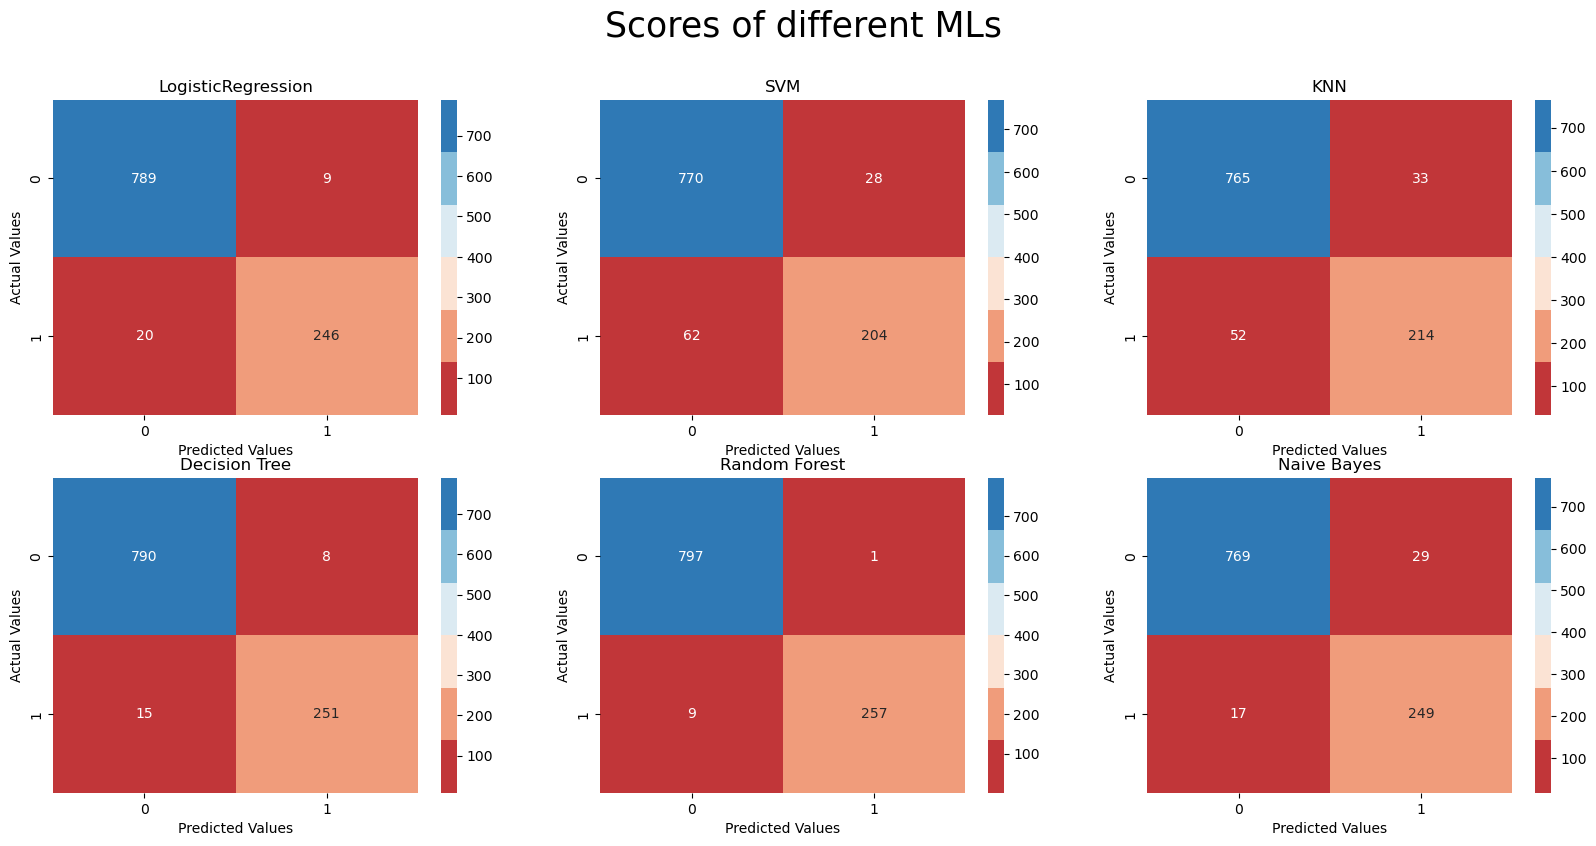

In [433]:
## plot confusion matrix
colormap = sns.color_palette("RdBu")


fig = plt.figure(figsize=(20,9))
for i in range(len(cm_list)):
    cm = cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap = colormap, fmt= '.0f')
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values')
plt.suptitle('Scores of different MLs', fontsize= 25)

plt.show()

In [401]:
### accuracy and AUC
results_df = pd.DataFrame({'Model': model_list, 'Accuracy': acc_list, 'AUC': auc_list})
results_df

,Model,Accuracy,AUC
0,LogisticRegression,0.972744,0.96
1,SVM,0.915414,0.87
2,KNN,0.920113,0.88
3,Decision Tree,0.973684,0.96
4,Random Forest,0.989662,0.98
5,Naive Bayes,0.956767,0.95
